# CÀI ĐẶT THƯ VIỆN

In [1]:
!pip install -Uqq underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.1 MB/s eta 0:00:00


In [5]:
!pip install torch==2.2.2 torchtext==0.17.2 torchvision==0.17.2 torchaudio==2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/

# TẢI DỮ LIỆU VÀ WORD EMBEDDING

In [1]:
# Tải dataset VI_IMDB (152MB) và Vietnamese word2vec (1.8GB)
# link "https://docs.google.com/uc?export=download&id=1ddtXoXtQc5hRzj-J6_y0rtoSTfbwrLOP&confirm=t"
# link "https://docs.google.com/uc?export=download&id=1qsNJ6xmXqLg_xQ51-OONNHjYaERsh5RE&confirm=t"

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Sentiment Analysis/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Sentiment Analysis/dataset


# LOAD PRETRAINED WORD2VEC

In [2]:
import torch
import torchtext.vocab as vocab


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

In [3]:
print("Đang load word embedding (có thể mất 1-2 phút)...")
word_embedding = vocab.Vectors(
    name="vi_word2vec.txt",
    unk_init=torch.Tensor.normal_
)
print(f"✓ Word embedding shape: {word_embedding.vectors.shape}")
print(f"  - Số từ: {word_embedding.vectors.shape[0]:,}")
print(f"  - Số chiều: {word_embedding.vectors.shape[1]}")

# Test xem word2vec có hoạt động không
def get_vector(embeddings, word):
    assert word in embeddings.stoi, f'*{word}* không có trong vocab!'
    return embeddings.vectors[embeddings.stoi[word]]

def closest_words(embeddings, vector, n=5):
    distances = [(word, torch.dist(vector, get_vector(embeddings, word)).item())
                 for word in list(embeddings.itos)[:10000]]  # Chỉ test 10k từ đầu
    return sorted(distances, key=lambda w: w[1])[:n]

# Test với từ "Việt_Nam"
if "Việt_Nam" in word_embedding.stoi:
    word_vector = get_vector(word_embedding, "Việt_Nam")
    print(f"\n✓ Các từ gần nghĩa với 'Việt_Nam':")
    for word, dist in closest_words(word_embedding, word_vector):
        print(f"  - {word}: {dist:.3f}")

Đang load word embedding (có thể mất 1-2 phút)...


100%|█████████▉| 1587506/1587507 [01:17<00:00, 20510.42it/s]


✓ Word embedding shape: torch.Size([1587507, 100])
  - Số từ: 1,587,507
  - Số chiều: 100

✓ Các từ gần nghĩa với 'Việt_Nam':
  - Việt_Nam: 0.000
  - VN: 0.661
  - Trung_Quốc: 0.681
  - nước: 0.746
  - TQ: 0.754


# XÂY DỰNG LỚP VOCABULARY

In [4]:
from itertools import chain
from collections import Counter
from tqdm.auto import tqdm
from underthesea import word_tokenize

In [5]:
class Vocabulary:
    """Lớp Vocabulary quản lý từ điển và chuyển đổi text <-> số"""

    def __init__(self):
        self.word2id = dict()
        self.word2id['<pad>'] = 0   # Token padding
        self.word2id['<unk>'] = 1   # Token unknown
        self.unk_id = self.word2id['<unk>']
        self.id2word = {v: k for k, v in self.word2id.items()}

    def __getitem__(self, word):
        """Lấy ID của từ"""
        return self.word2id.get(word, self.unk_id)

    def __contains__(self, word):
        """Kiểm tra từ có trong vocab không"""
        return word in self.word2id

    def __len__(self):
        """Số lượng từ trong vocab"""
        return len(self.word2id)

    def add(self, word):
        """Thêm từ vào vocab"""
        if word not in self:
            word_index = self.word2id[word] = len(self.word2id)
            self.id2word[word_index] = word
            return word_index
        else:
            return self[word]

    @staticmethod
    def tokenize_corpus(corpus):
        """Tách từ cho corpus"""
        print("Đang tokenize corpus...")
        tokenized_corpus = []
        for document in tqdm(corpus, desc="Tokenizing"):
            # Sử dụng underthesea để tách từ tiếng Việt
            tokenized_document = [
                word.replace(" ", "_")
                for word in word_tokenize(document)
            ]
            tokenized_corpus.append(tokenized_document)
        return tokenized_corpus

    def corpus_to_tensor(self, corpus, is_tokenized=False):
        """Chuyển corpus thành tensor indices"""
        if not is_tokenized:
            tokenized_corpus = self.tokenize_corpus(corpus)
        else:
            tokenized_corpus = corpus

        indices_corpus = []
        for document in tqdm(tokenized_corpus, desc="Converting to tensor"):
            indices_document = torch.tensor(
                [self[word] for word in document],
                dtype=torch.int64
            )
            indices_corpus.append(indices_document)
        return indices_corpus

# Tạo vocabulary từ word embedding
print("Đang tạo vocabulary...")
vocab_obj = Vocabulary()
for word in tqdm(list(word_embedding.stoi.keys()), desc="Building vocab"):
    vocab_obj.add(word)
print(f"✓ Vocabulary size: {len(vocab_obj):,}")

Đang tạo vocabulary...


Building vocab:   0%|          | 0/1587507 [00:00<?, ?it/s]

✓ Vocabulary size: 1,587,509


In [6]:
# Test vocabulary
test_corpus = ["Bộ phim này rất hay!", "Diễn viên đóng tệ quá"]
print("\n✓ Test Vocabulary:")
print(f"Câu gốc: {test_corpus[0]}")
tokenized = Vocabulary.tokenize_corpus([test_corpus[0]])
print(f"Sau tokenize: {tokenized[0][:10]}...")  # In 10 từ đầu


✓ Test Vocabulary:
Câu gốc: Bộ phim này rất hay!
Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Sau tokenize: ['Bộ', 'phim', 'này', 'rất', 'hay', '!']...


# XÂY DỰNG LỚP DATASET

In [7]:
import pandas as pd
from torch.utils.data import Dataset

In [8]:
class IMDBDataset(Dataset):
    """Dataset cho VI_IMDB"""

    def __init__(self, vocab, csv_fpath, tokenized_fpath=None):
        self.vocab = vocab
        self.pad_idx = vocab["<pad>"]

        # Đọc dữ liệu
        print(f"Đang đọc dữ liệu từ {csv_fpath}...")
        df = pd.read_csv(csv_fpath)
        self.sentiments_list = list(df.sentiment)
        self.reviews_list = list(df.vi_review)

        # Tạo mapping sentiment -> id
        sentiments_type = sorted(list(set(self.sentiments_list)))
        self.sentiment2id = {s: i for i, s in enumerate(sentiments_type)}
        print(f"Sentiment mapping: {self.sentiment2id}")

        # Tokenize hoặc load tokenized data
        if tokenized_fpath:
            print(f"Đang load tokenized data từ {tokenized_fpath}...")
            self.tokenized_reviews = torch.load(tokenized_fpath)
        else:
            print("Đang tokenize reviews...")
            self.tokenized_reviews = self.vocab.tokenize_corpus(
                self.reviews_list
            )
            # Có thể save để dùng lại: torch.save(self.tokenized_reviews, "tokenized.pt")

        # Chuyển thành tensor
        print("Đang chuyển đổi thành tensor...")
        self.tensor_data = self.vocab.corpus_to_tensor(
            self.tokenized_reviews,
            is_tokenized=True
        )
        self.tensor_label = torch.tensor(
            [self.sentiment2id[s] for s in self.sentiments_list],
            dtype=torch.float64
        )

    def __len__(self):
        return len(self.tensor_data)

    def __getitem__(self, idx):
        return self.tensor_data[idx], self.tensor_label[idx]

    def collate_fn(self, examples):
        """Collate function để xử lý batch có độ dài khác nhau"""
        # Sắp xếp theo độ dài giảm dần (yêu cầu của pack_padded_sequence)
        examples = sorted(examples, key=lambda e: len(e[0]), reverse=True)

        reviews = [e[0] for e in examples]
        # Padding các sequence về cùng độ dài
        reviews = torch.nn.utils.rnn.pad_sequence(
            reviews,
            batch_first=False,
            padding_value=self.pad_idx
        )
        reviews_lengths = torch.tensor([len(e[0]) for e in examples])
        sentiments = torch.tensor([e[1] for e in examples])

        return {
            "reviews": (reviews, reviews_lengths),
            "sentiments": sentiments
        }

# Load dataset
dataset = IMDBDataset(vocab_obj, "VI_IMDB.csv")
print(f"Dataset size: {len(dataset)}")

Đang đọc dữ liệu từ VI_IMDB.csv...
Sentiment mapping: {'negative': 0, 'positive': 1}
Đang tokenize reviews...
Đang tokenize corpus...


Tokenizing:   0%|          | 0/50000 [00:00<?, ?it/s]

Đang chuyển đổi thành tensor...


Converting to tensor:   0%|          | 0/50000 [00:00<?, ?it/s]

Dataset size: 50000


# CHIA DỮ LIỆU TRAIN/VALID/TEST

In [9]:
from torch.utils.data import random_split, DataLoader

In [10]:
# Chia dữ liệu: 80% train, 10% valid, 10% test
split_rate = 0.8
full_size = len(dataset)
train_size = int(split_rate * full_size)
valid_size = int((full_size - train_size) / 2)
test_size = full_size - train_size - valid_size

train_dataset, valid_dataset, test_dataset = random_split(
    dataset,
    lengths=[train_size, valid_size, test_size]
)

print(f"Train: {len(train_dataset)}, Valid: {len(valid_dataset)}, Test: {len(test_dataset)}")

# Tạo DataLoader
BATCH_SIZE = 100

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=dataset.collate_fn
)

valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=dataset.collate_fn
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=dataset.collate_fn
)

Train: 40000, Valid: 5000, Test: 5000


# XÂY DỰNG MODEL RNN (LSTM)

In [11]:
import torch.nn as nn

In [12]:
class RNN(nn.Module):
    """Model RNN sử dụng LSTM cho sentiment analysis"""

    def __init__(self, vocab_size, embedding_dim, hidden_dim,
                 n_layers, bidirectional, dropout, pad_idx):
        super().__init__()

        # Embedding layer
        self.embedding = nn.Embedding(
            vocab_size,
            embedding_dim,
            padding_idx=pad_idx
        )

        # LSTM layer
        self.rnn = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout
        )

        # Fully connected layer
        # *2 vì bidirectional LSTM có 2 hướng
        self.fc = nn.Linear(hidden_dim * 2, 1)

        # Dropout layer
        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):
        """
        Args:
            text: [sent_len, batch_size]
            text_lengths: [batch_size]
        """
        # Embedding: [sent_len, batch_size, emb_dim]
        embedded = self.dropout(self.embedding(text))

        # Pack sequence để xử lý hiệu quả
        packed_embedded = nn.utils.rnn.pack_padded_sequence(
            embedded,
            text_lengths.to('cpu')
        )

        # LSTM
        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        # hidden: [num_layers * num_directions, batch_size, hid_dim]
        # Concat hidden state cuối của 2 hướng
        hidden = self.dropout(
            torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        )
        # hidden: [batch_size, hid_dim * num_directions]

        return self.fc(hidden)

In [13]:
# Khởi tạo model
INPUT_DIM = word_embedding.vectors.shape[0]
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = vocab_obj["<pad>"]
UNK_IDX = vocab_obj["<unk>"]

model = RNN(
    INPUT_DIM,
    EMBEDDING_DIM,
    HIDDEN_DIM,
    N_LAYERS,
    BIDIRECTIONAL,
    DROPOUT,
    PAD_IDX
)

# Load pretrained word embedding
print("Đang load pretrained embedding vào model...")
model.embedding.weight.data.copy_(word_embedding.vectors)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Model có {count_parameters(model):,} tham số')

Đang load pretrained embedding vào model...
Model có 161,061,357 tham số


# THIẾT LẬP TRAINING

In [14]:
import torch.optim as optim

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Đang sử dụng device: {device}")

optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss().to(device)
model = model.to(device)

def binary_accuracy(preds, y):
    """Tính accuracy cho bài toán binary classification"""
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

def train(model, dataloader, optimizer, criterion, device):
    """Training function"""
    epoch_loss = 0
    epoch_acc = 0
    model.train()

    for batch in dataloader:
        optimizer.zero_grad()

        reviews, reviews_lengths = batch["reviews"]
        reviews = reviews.to(device)
        predictions = model(reviews, reviews_lengths).squeeze(1)

        sentiments = batch["sentiments"].to(device)
        loss = criterion(predictions, sentiments)
        acc = binary_accuracy(predictions, sentiments)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    batch_num = len(dataloader)
    return epoch_loss / batch_num, epoch_acc / batch_num

def evaluate(model, dataloader, criterion, device):
    """Evaluation function"""
    epoch_loss = 0
    epoch_acc = 0
    model.eval()

    with torch.no_grad():
        for batch in dataloader:
            reviews, reviews_lengths = batch["reviews"]
            reviews = reviews.to(device)
            predictions = model(reviews, reviews_lengths).squeeze(1)

            sentiments = batch["sentiments"].to(device)
            loss = criterion(predictions, sentiments)
            acc = binary_accuracy(predictions, sentiments)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    batch_num = len(dataloader)
    return epoch_loss / batch_num, epoch_acc / batch_num

Đang sử dụng device: cuda


# TRAINING MODEL

In [16]:
import time

In [19]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

N_EPOCHS = 5
best_valid_loss = float('inf')

print("="*60)
print("BẮT ĐẦU TRAINING")
print("="*60)
print(f"Số epochs: {N_EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Learning rate: {optimizer.param_groups[0]['lr']}")
print("="*60 + "\n")

training_stats = []

for epoch in range(N_EPOCHS):
    start_time = time.time()

    print(f"📊 Epoch {epoch+1}/{N_EPOCHS}")

    train_loss, train_acc = train(
        model, train_dataloader, optimizer, criterion, device
    )
    valid_loss, valid_acc = evaluate(
        model, valid_dataloader, criterion, device
    )

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # Save model tốt nhất
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "best_model.pt")
        print(f"  ✓ Đã lưu model tốt nhất!")

    # Lưu lại stats
    training_stats.append({
        'epoch': epoch + 1,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'valid_loss': valid_loss,
        'valid_acc': valid_acc,
        'time': f"{epoch_mins}m {epoch_secs}s"
    })

    print(f"  ⏱️  Thời gian: {epoch_mins}m {epoch_secs}s")
    print(f"  📈 Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%")
    print(f"  📊 Valid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:.2f}%")
    print()

print("="*60)
print("✓ HOÀN THÀNH TRAINING")
print("="*60)

# Hiển thị bảng tổng kết
import pandas as pd
stats_df = pd.DataFrame(training_stats)
print("\n📊 Tổng kết Training:")
print(stats_df.to_string(index=False))

BẮT ĐẦU TRAINING
Số epochs: 5
Batch size: 100
Learning rate: 0.001

📊 Epoch 1/5
  ✓ Đã lưu model tốt nhất!
  ⏱️  Thời gian: 1m 54s
  📈 Train Loss: 0.142 | Train Acc: 94.85%
  📊 Valid Loss: 0.299 | Valid Acc: 88.40%

📊 Epoch 2/5
  ⏱️  Thời gian: 1m 54s
  📈 Train Loss: 0.111 | Train Acc: 96.26%
  📊 Valid Loss: 0.340 | Valid Acc: 88.04%

📊 Epoch 3/5
  ⏱️  Thời gian: 1m 52s
  📈 Train Loss: 0.088 | Train Acc: 97.06%
  📊 Valid Loss: 0.422 | Valid Acc: 87.68%

📊 Epoch 4/5
  ⏱️  Thời gian: 1m 52s
  📈 Train Loss: 0.069 | Train Acc: 97.72%
  📊 Valid Loss: 0.407 | Valid Acc: 87.66%

📊 Epoch 5/5
  ⏱️  Thời gian: 1m 52s
  📈 Train Loss: 0.059 | Train Acc: 98.09%
  📊 Valid Loss: 0.448 | Valid Acc: 87.46%

✓ HOÀN THÀNH TRAINING

📊 Tổng kết Training:
 epoch  train_loss  train_acc  valid_loss  valid_acc   time
     1    0.141850   0.948475    0.299292     0.8840 1m 54s
     2    0.111040   0.962650    0.339713     0.8804 1m 54s
     3    0.088026   0.970625    0.422143     0.8768 1m 52s
     4    0.0691

# ĐÁNH GIÁ MODEL TRÊN TEST SET

In [20]:
# Load model tốt nhất
print("Đang load model tốt nhất...")
model.load_state_dict(torch.load("best_model.pt"))

test_loss, test_acc = evaluate(model, test_dataloader, criterion, device)

print("\n" + "="*60)
print("📊 KẾT QUẢ TRÊN TEST SET")
print("="*60)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test Acc:  {test_acc*100:.2f}%")
print("="*60)

# So sánh với validation
print(f"\n📌 So sánh:")
print(f"  Valid Acc: {valid_acc*100:.2f}%")
print(f"  Test Acc:  {test_acc*100:.2f}%")
print(f"  Chênh lệch: {abs(valid_acc - test_acc)*100:.2f}%")

Đang load model tốt nhất...

📊 KẾT QUẢ TRÊN TEST SET
Test Loss: 0.300
Test Acc:  88.28%

📌 So sánh:
  Valid Acc: 87.46%
  Test Acc:  88.28%
  Chênh lệch: 0.82%


#  SỬ DỤNG MODEL ĐỂ DỰ ĐOÁN

In [21]:
def predict_sentiment(model, sentence, vocab, device):
    """Dự đoán sentiment cho 1 câu"""
    model.eval()

    # Tokenize câu
    corpus = [sentence]
    tensor = vocab.corpus_to_tensor(corpus)[0].to(device)
    tensor = tensor.unsqueeze(1)  # [seq_len, 1]
    length = torch.LongTensor([len(tensor)])

    with torch.no_grad():
        prediction = torch.sigmoid(model(tensor, length))

    return prediction.item()

# Sentiment mapping
sentiment_map = {0: 'NEGATIVE', 1: 'POSITIVE'}
print("Sentiment mapping:", dataset.sentiment2id)
print()

# Test với nhiều câu mẫu
test_sentences = [
    "Bộ phim này rất dở! Nội dung cực kì nhàm chán",
    "Bộ phim này rất hay! Nhiều tình tiết rất kịch tính.",
    "Diễn viên đóng hay, kịch bản tốt, đáng xem!",
    "Tôi không thích bộ phim này. Quá tệ và lãng phí thời gian.",
    "Xuất sắc! Đây là một trong những bộ phim hay nhất tôi từng xem.",
    "Phim bình thường, không có gì đặc sắc",
    "Cảnh quay đẹp nhưng nội dung nhạt nhẽo",
    "Tôi rất thất vọng về bộ phim này",
    "Phim cảm động, diễn xuất tuyệt vời",
    "Không nên xem, lãng phí tiền"
]

print("="*70)
print("🔮 THỬ NGHIỆM DỰ ĐOÁN SENTIMENT")
print("="*70 + "\n")

for i, sentence in enumerate(test_sentences, 1):
    score = predict_sentiment(model, sentence, vocab_obj, device)
    sentiment = "✅ POSITIVE" if score > 0.5 else "❌ NEGATIVE"
    confidence = score if score > 0.5 else (1 - score)

    print(f"{i}. {sentence}")
    print(f"   Score: {score:.4f} → {sentiment} (confidence: {confidence*100:.1f}%)")
    print()

print("="*70)

# Thêm function tương tác
def interactive_predict():
    """Function để người dùng nhập câu và dự đoán"""
    print("\n" + "="*70)
    print("🎯 CHẾ ĐỘ DỰ ĐOÁN TƯƠNG TÁC")
    print("="*70)
    print("Nhập câu tiếng Việt để dự đoán sentiment (hoặc 'quit' để thoát)")
    print()

    while True:
        sentence = input("📝 Nhập câu: ").strip()

        if sentence.lower() in ['quit', 'exit', 'q']:
            print("👋 Tạm biệt!")
            break

        if not sentence:
            print("⚠️  Vui lòng nhập câu!")
            continue

        score = predict_sentiment(model, sentence, vocab_obj, device)
        sentiment = "✅ POSITIVE" if score > 0.5 else "❌ NEGATIVE"
        confidence = score if score > 0.5 else (1 - score)

        print(f"   Score: {score:.4f}")
        print(f"   Kết quả: {sentiment}")
        print(f"   Độ tin cậy: {confidence*100:.1f}%")
        print()

Sentiment mapping: {'negative': 0, 'positive': 1}

🔮 THỬ NGHIỆM DỰ ĐOÁN SENTIMENT

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

1. Bộ phim này rất dở! Nội dung cực kì nhàm chán
   Score: 0.0024 → ❌ NEGATIVE (confidence: 99.8%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

2. Bộ phim này rất hay! Nhiều tình tiết rất kịch tính.
   Score: 0.9033 → ✅ POSITIVE (confidence: 90.3%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

3. Diễn viên đóng hay, kịch bản tốt, đáng xem!
   Score: 0.8834 → ✅ POSITIVE (confidence: 88.3%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

4. Tôi không thích bộ phim này. Quá tệ và lãng phí thời gian.
   Score: 0.0090 → ❌ NEGATIVE (confidence: 99.1%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

5. Xuất sắc! Đây là một trong những bộ phim hay nhất tôi từng xem.
   Score: 0.9916 → ✅ POSITIVE (confidence: 99.2%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

6. Phim bình thường, không có gì đặc sắc
   Score: 0.0327 → ❌ NEGATIVE (confidence: 96.7%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

7. Cảnh quay đẹp nhưng nội dung nhạt nhẽo
   Score: 0.0656 → ❌ NEGATIVE (confidence: 93.4%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

8. Tôi rất thất vọng về bộ phim này
   Score: 0.0049 → ❌ NEGATIVE (confidence: 99.5%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

9. Phim cảm động, diễn xuất tuyệt vời
   Score: 0.9994 → ✅ POSITIVE (confidence: 99.9%)

Đang tokenize corpus...


Tokenizing:   0%|          | 0/1 [00:00<?, ?it/s]

Converting to tensor:   0%|          | 0/1 [00:00<?, ?it/s]

10. Không nên xem, lãng phí tiền
   Score: 0.0019 → ❌ NEGATIVE (confidence: 99.8%)



# VISUALIZE KẾT QUẢ

In [23]:
import matplotlib.pyplot as plt

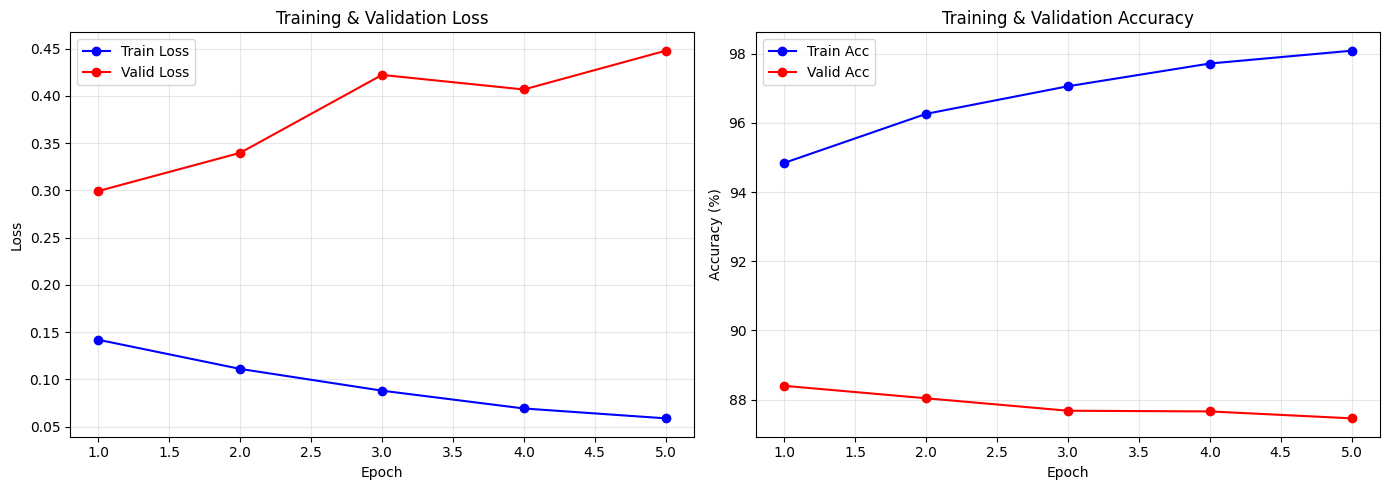

✓ Đã lưu biểu đồ vào training_history.png


In [24]:
# Vẽ biểu đồ training history
if 'training_stats' in locals():
    stats_df = pd.DataFrame(training_stats)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot Loss
    axes[0].plot(stats_df['epoch'], stats_df['train_loss'], 'b-o', label='Train Loss')
    axes[0].plot(stats_df['epoch'], stats_df['valid_loss'], 'r-o', label='Valid Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training & Validation Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot Accuracy
    axes[1].plot(stats_df['epoch'], stats_df['train_acc']*100, 'b-o', label='Train Acc')
    axes[1].plot(stats_df['epoch'], stats_df['valid_acc']*100, 'r-o', label='Valid Acc')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy (%)')
    axes[1].set_title('Training & Validation Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Đã lưu biểu đồ vào training_history.png")
else:
    print("⚠️  Chưa có dữ liệu training để visualize")

# SAVE VÀ LOAD MODEL

In [25]:
# Save toàn bộ (model + vocab + hyperparameters)
checkpoint = {
    'model_state_dict': model.state_dict(),
    'vocab_word2id': vocab_obj.word2id,
    'vocab_id2word': vocab_obj.id2word,
    'sentiment2id': dataset.sentiment2id,
    'hyperparameters': {
        'INPUT_DIM': INPUT_DIM,
        'EMBEDDING_DIM': EMBEDDING_DIM,
        'HIDDEN_DIM': HIDDEN_DIM,
        'N_LAYERS': N_LAYERS,
        'BIDIRECTIONAL': BIDIRECTIONAL,
        'DROPOUT': DROPOUT,
        'PAD_IDX': PAD_IDX,
        'UNK_IDX': UNK_IDX
    }
}

torch.save(checkpoint, 'complete_model.pt')
print("✓ Đã lưu toàn bộ model vào complete_model.pt")

✓ Đã lưu toàn bộ model vào complete_model.pt


In [27]:
# Hướng dẫn load lại model
load_example = """
# ====================================================================
# CODE ĐỂ LOAD LẠI MODEL
# ====================================================================

# 1. Load checkpoint
checkpoint = torch.load('complete_model.pt', map_location='cpu')

# 2. Khôi phục vocabulary
vocab_obj = Vocabulary()
vocab_obj.word2id = checkpoint['vocab_word2id']
vocab_obj.id2word = checkpoint['vocab_id2word']

# 3. Khôi phục model
params = checkpoint['hyperparameters']
model = RNN(
    params['INPUT_DIM'],
    params['EMBEDDING_DIM'],
    params['HIDDEN_DIM'],
    params['N_LAYERS'],
    params['BIDIRECTIONAL'],
    params['DROPOUT'],
    params['PAD_IDX']
)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# 4. Dự đoán
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
score = predict_sentiment(model, "Phim rất hay!", vocab_obj, device)
print(f"Score: {score:.4f}")
"""

print("\n📝 Code để load lại model:")
print(load_example)

print("\n" + "="*70)
print("✅ HOÀN THÀNH TẤT CẢ CÁC BƯỚC!")
print("="*70)
print("\n📌 Tóm tắt:")
print(f"  - Dataset: {len(dataset):,} reviews")
print(f"  - Vocab size: {len(vocab_obj):,} words")
print(f"  - Model parameters: {count_parameters(model):,}")
print(f"  - Test Accuracy: {test_acc*100:.2f}%")
print(f"  - Files đã lưu:")
print(f"    + best_model.pt - Model tốt nhất")
print(f"    + complete_model.pt - Full checkpoint")
print(f"    + training_history.png - Biểu đồ training")
print(f"    + tokenized.pt - Tokenized data (nếu có)")
print("\n💡 Bạn có thể download các file này về máy!")
print("\n🎉 Chúc mừng bạn đã hoàn thành model sentiment analysis!")


📝 Code để load lại model:

# ====================================================================
# CODE ĐỂ LOAD LẠI MODEL
# ====================================================================

# 1. Load checkpoint
checkpoint = torch.load('complete_model.pt', map_location='cpu')

# 2. Khôi phục vocabulary
vocab_obj = Vocabulary()
vocab_obj.word2id = checkpoint['vocab_word2id']
vocab_obj.id2word = checkpoint['vocab_id2word']

# 3. Khôi phục model
params = checkpoint['hyperparameters']
model = RNN(
    params['INPUT_DIM'],
    params['EMBEDDING_DIM'],
    params['HIDDEN_DIM'],
    params['N_LAYERS'],
    params['BIDIRECTIONAL'],
    params['DROPOUT'],
    params['PAD_IDX']
)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# 4. Dự đoán
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
score = predict_sentiment(model, "Phim rất hay!", vocab_obj, device)
print(f"Score: {score:.4f}")


✅ HOÀN THÀNH TẤT CẢ CÁC BƯỚC!

📌 Tóm tắt